# Capstone 3

Alzheimer’s disease is a neurodegenerative disease that involves the death of neurons within the brain. According to the Alzheimer’s Association, over 5 million people suffer from Alzheimer’s in the United States, and it is estimated to increase to 14 million by 2050. Therefore, being able to predict and identify factors that influence Alzheimer’s progression as well as being able to identify which stage of the disease’s progression a patient is affected by is becoming more essential.

Each step of the analyses performed below will be in 3 sections, where each one addresses related but different questions:

a. We will examine [clinical measurements and MRI measurements](https://www.kaggle.com/jboysen/mri-and-alzheimers) (note: not images) from Young, Middle Aged, Nondemented or Demented Older Adults to try to predict individual's affect by Alzheimer's disease.

b. We will examine [clinical measurements and MRI measurements](https://www.kaggle.com/jboysen/mri-and-alzheimers) (note: not images) from Nondemented and Demented Older Adults that were imaged at least 2 times in subsequent visits that spanned at least 1 year to try to predict individual's affected or will become affected by Alzheimer's disease.

c. We will examine [MRI image data](https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images?select=Alzheimer_s+Dataset) that classifies Alzheimer’s and Dementia patients into 4 classes (non-demented, very mildly demented, mildly demented, and moderately demented). These images will be utilized in attempting to identify which stage of Alzheimer's disease a patient is affected by.

In [1]:
# load python packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/shannonballard/Springboard/Springboard_Capstone_3'

## Data Collection, Data Definition, and Data Cleaning

### Data Collection - a

In [3]:
# load the data and print the first five rows
oasis_cs = pd.read_csv('oasis_cross_sectional.csv')
oasis_cs.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

### Data Definition - a

In [4]:
# Print the columns names
oasis_cs.columns

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')

In [5]:
# Check associated datatypes with columns
oasis_cs_dt = pd.DataFrame(oasis_cs.dtypes)
oasis_cs_dt = oasis_cs_dt.reset_index()
oasis_cs_dt.columns = ['Col_name','dtype']
oasis_cs_dt

Col_name    dtype
0        ID   object
1       M/F   object
2      Hand   object
3       Age    int64
4      Educ  float64
5       SES  float64
6      MMSE  float64
7       CDR  float64
8      eTIV    int64
9      nWBV  float64
10      ASF  float64
11    Delay  float64

In [6]:
# Make and save a figure of dataset description
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(columnwidth = [60,275, 100], header=dict(values=['Variable', 'Details', 'Type']),
                 cells=dict(values=[['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR',
                                    'eTIV', 'nWBV', 'ASF', 'Delay'],
                                    ['Image identification number', 'Gender of patient (M=male and F=female)', 'Patient handedness (right or left)',
                                    'Age of patients (in years)', 'Level of education (1 = lowest and 5 = highest)', 'Socioeconomic status (1 = highest status, 5 = lowest status)',
                                    'Mini mental state examination (see Table 2)', 'Clinical dementia rating (0 = no dementia, 0.5 = very mild dementia, 1 = mild dementia, 2 = moderate dementia, 3 = severe dementia)',
                                    'Estimated total intracranial volume (cm3)', 'Normalized whole brain volumes', 'Atlas scaling factor - comparison of eTIV based on normalization of head size',
                                    'Delay time before imaging in real time'], 
                                    ['Continuous', 'Categorical', 'Categorical', 'Continuous', 'Categorical', 'Categorical',
                                    'Continuous/Categorical', 'Categorical', 'Continuous', 'Continuous', 'Continuous', 'Continuous']]))
                     ])
fig.update_layout(
    title={
        'text': "Table 1: Description of Data",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=800,
    height=550)
fig.write_image('Table 1_Description of Data.png')
fig.show()

In [7]:
# Make and save a figure of dataset description
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(columnwidth = [100,100], header=dict(values=['Education level', 'Cutoff Score']),
                 cells=dict(values=[['7th grade or lower', '8th grade or some high school (did not finish)', 'High school graduate',
                                     'Some college or higher'],
                                    ['22 or below', '24 or below', '25 or below', '26 or below']]))
                     ])
fig.update_layout(
    title={
        'text': "Table 2: MMSE Scoring Cutoffs (scores below cutoff suggest cognitive impairment)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=800,
    height=300)
fig.write_image('Table 2_MMSE scoring cutoffs.png')
fig.show()

In [8]:
# Check shape of dataset
oasis_cs.shape

(436, 12)

In [9]:
# Review summary statistics
oasis_cs.describe()

Age        Educ         SES       MMSE         CDR         eTIV  \
count  436.000000  235.000000  216.000000  235.00000  235.000000   436.000000   
mean    51.357798    3.178723    2.490741   27.06383    0.285106  1481.919725   
std     25.269862    1.311510    1.120593    3.69687    0.383405   158.740866   
min     18.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     23.000000    2.000000    2.000000   26.00000    0.000000  1367.750000   
50%     54.000000    3.000000    2.000000   29.00000    0.000000  1475.500000   
75%     74.000000    4.000000    3.000000   30.00000    0.500000  1579.250000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF     Delay  
count  436.000000  436.000000  20.00000  
mean     0.791670    1.198894  20.55000  
std      0.059937    0.128682  23.86249  
min      0.644000    0.881000   1.00000  
25%      0.742750    1.111750   2.75000  
50%      0.809000    1.190000  11.00000  
75%      0.842000    1.284250  30.75000  
max      0.893000    1.563000  89.00000

### Data Cleaning - a

In [10]:
# Are there missing values? Sum all missing values for each column
oasis_cs.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

There are missing values in the following columns:
* Educ
* SES
* MMSE
* CDR
* Delay

Because 416 out of the 436 patients have missing values for the 'Delay' variable, this column will be dropped. This is an imaging parameter, so it should not have much affect on other features.

The ID column will also be dropped, as this is not relevant for future analyses.

In [11]:
# drop 'ID' and 'Delay' columns
oasis_cs = oasis_cs.drop(['ID', 'Delay'], axis = 1)

In [12]:
# Check for duplicate rows
oasis_cs_duplicate_rows = oasis_cs[oasis_cs.duplicated()]
oasis_cs_duplicate_rows

Empty DataFrame
Columns: [M/F, Hand, Age, Educ, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: []

There are no duplicate rows.

One thing of interest is that 'Educ', 'MMSE', and 'CDR' all have the same number of missing values. It could be that if 'Educ' is missing in one individual, that individual also has missing values for 'MMSE' and 'CDR'.

In [13]:
# Look for NaN's in 'Educ', 'MMSE', and 'CDR'
oasis_cs.head(15)

M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0    F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1    F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2    F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207
3    M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105
4    M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010
5    F    R   24   NaN  NaN   NaN  NaN  1131  0.862  1.551
6    M    R   21   NaN  NaN   NaN  NaN  1516  0.830  1.157
7    F    R   20   NaN  NaN   NaN  NaN  1505  0.843  1.166
8    M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9    F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329
10   M    R   30   NaN  NaN   NaN  NaN  1574  0.842  1.115
11   F    R   81   5.0  2.0  30.0  0.0  1664  0.679  1.055
12   F    R   19   NaN  NaN   NaN  NaN  1525  0.856  1.151
13   M    R   76   2.0  NaN  28.0  0.5  1738  0.719  1.010
14   M    R   82   2.0  4.0  27.0  0.5  1477  0.739  1.188

It appears as if individuals with missing values for 'Educ' also have missing values for 'MMSE' and 'CDR'.

Since this accounts for approximately half of the dataset, this will be further looked at.

In [14]:
oasis_cs_nan = oasis_cs[oasis_cs['Educ'].isna()]
oasis_cs_nan.head()

M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
3   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105
4   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010
5   F    R   24   NaN  NaN   NaN  NaN  1131  0.862  1.551
6   M    R   21   NaN  NaN   NaN  NaN  1516  0.830  1.157
7   F    R   20   NaN  NaN   NaN  NaN  1505  0.843  1.166

In [15]:
# Are individuals in oasis_cs_nan of younger ages?
# Could they still be in school?
# Check unique values in 'Age' column
oasis_cs_nan['Age'].unique()

array([28, 18, 24, 21, 20, 30, 19, 43, 27, 23, 38, 29, 57, 48, 25, 40, 22,
       26, 34, 41, 50, 35, 44, 31, 49, 37, 54, 45, 33, 46, 58, 55])

There seems to be a wide range (18 years - 58 years) of ages, so it's unlikely they are still in school.

Because of this wide range of ages, it may prove difficult to try to use this feature to fill in NaNs in other columns.

In [16]:
# create df with rows that do not contain a NaN in 'Educ' column
oasis_cs_nonan = oasis_cs[oasis_cs['Educ'].notna()]
oasis_cs_nonan.head()

M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073
9   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329

In [17]:
oasis_cs_nonan.to_csv('oasis_cs_nonan.csv')

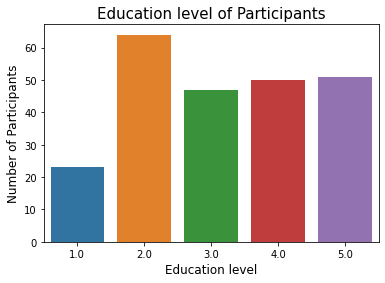

In [18]:
# Visualize the education level of participants
sns.countplot(x='Educ', data=oasis_cs_nonan);
plt.title('Education level of Participants', fontsize = 15)
plt.xlabel('Education level', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.savefig('Educ level.png', transparent=True);

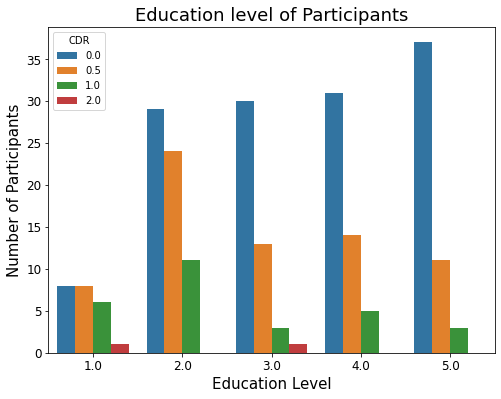

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=oasis_cs_nonan,x='Educ',hue='CDR')
plt.title('Education level of Participants', fontsize = 18)
plt.xlabel('Education Level', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Participants', fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title="CDR", title_fontsize= 10, prop={'size': 10})
plt.savefig('Educ graph.png', transparent=True);

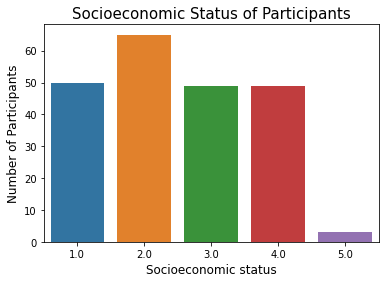

In [20]:
# Visualize the socioeconomic status of participants
sns.countplot(x='SES', data=oasis_cs_nonan);
plt.title('Socioeconomic Status of Participants', fontsize = 15)
plt.xlabel('Socioeconomic status', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.savefig('SES graph.png', transparent=True);

<AxesSubplot:xlabel='SES', ylabel='count'>

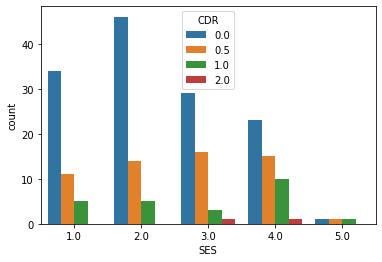

In [21]:
sns.countplot(data=oasis_cs_nonan,x='SES',hue='CDR')

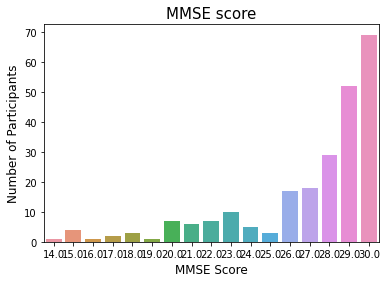

In [22]:
# Visualize the MMSE
sns.countplot(x='MMSE', data=oasis_cs_nonan);
plt.title('MMSE score', fontsize = 15)
plt.xlabel('MMSE Score', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.savefig('MMSE scores.png', transparent=True);

<AxesSubplot:xlabel='MMSE', ylabel='count'>

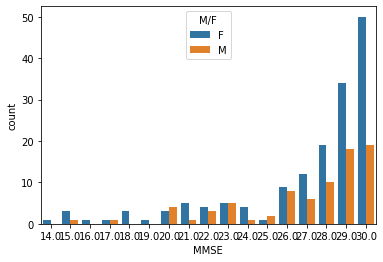

In [23]:
sns.countplot(data=oasis_cs_nonan,x='MMSE',hue='M/F')

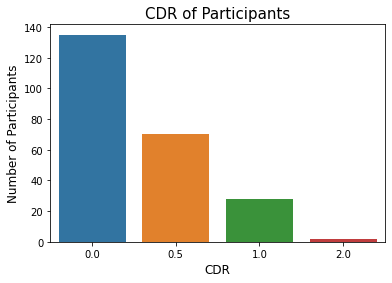

In [24]:
# Visualize the CDR
sns.countplot(x='CDR', data=oasis_cs_nonan);
plt.title('CDR of Participants', fontsize = 15)
plt.xlabel('CDR', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.savefig('CDR scores.png', transparent=True);

<AxesSubplot:xlabel='CDR', ylabel='count'>

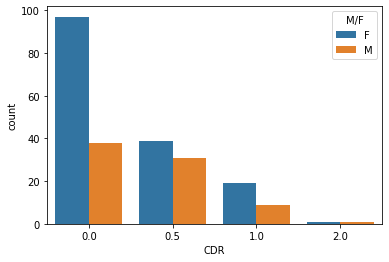

In [25]:
sns.countplot(data=oasis_cs_nonan,x='CDR',hue='M/F')

There does not seem to be an obvious pattern to try to fill in the NaNs based values in other columns. Therefore, the rows for 'Educ', 'SES', 'MMSE', and 'CDR' will be dropped. This was previously performed with the oasis_cs_nonan df.

In [26]:
oasis_cs_nonan.isnull().sum()

M/F      0
Hand     0
Age      0
Educ     0
SES     19
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

There are 19 missing values for SES. Since this feature is categorical, the missing values will be filled in with the mode.

In [27]:
oasis_cs_nonan['SES'].fillna(oasis_cs_nonan['SES'].mode()[0], inplace=True)

/Users/shannonballard/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
oasis_cs_nonan.isnull().sum()

M/F     0
Hand    0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

In [29]:
oasis_cs_nonan.to_csv('oasis_cs_nonan.csv')

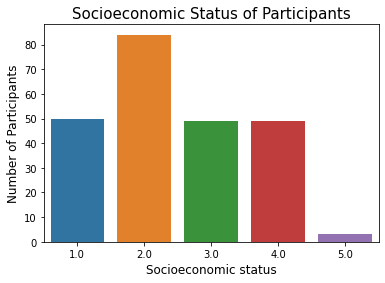

In [30]:
# Visualize the socioeconomic status of participants
sns.countplot(x='SES', data=oasis_cs_nonan);
plt.title('Socioeconomic Status of Participants', fontsize = 15)
plt.xlabel('Socioeconomic status', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

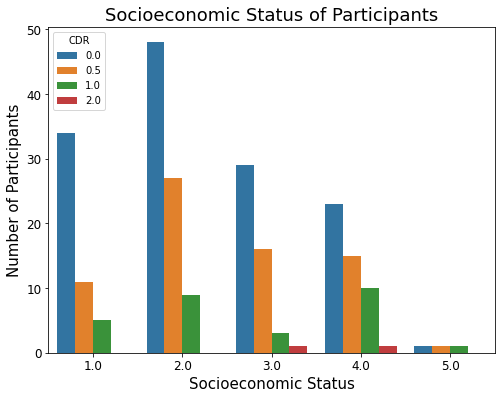

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data=oasis_cs_nonan,x='SES',hue='CDR')
plt.title('Socioeconomic Status of Participants', fontsize = 18)
plt.xlabel('Socioeconomic Status', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Participants', fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title="CDR", title_fontsize= 10, prop={'size': 10})
plt.savefig('SES graph.png', transparent=True);

In [32]:
# Review summary statistics
oasis_cs_nonan.describe()

Age        Educ         SES       MMSE         CDR         eTIV  \
count  235.000000  235.000000  235.000000  235.00000  235.000000   235.000000   
mean    72.344681    3.178723    2.451064   27.06383    0.285106  1459.497872   
std     12.091369    1.311510    1.082470    3.69687    0.383405   160.368070   
min     33.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     66.000000    2.000000    2.000000   26.00000    0.000000  1348.000000   
50%     73.000000    3.000000    2.000000   29.00000    0.000000  1447.000000   
75%     81.000000    4.000000    3.000000   30.00000    0.500000  1548.000000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF  
count  235.000000  235.000000  
mean     0.749132    1.216511  
std      0.047906    0.129427  
min      0.644000    0.881000  
25%      0.713500    1.133500  
50%      0.747000    1.213000  
75%      0.784000    1.302000  
max      0.847000    1.563000

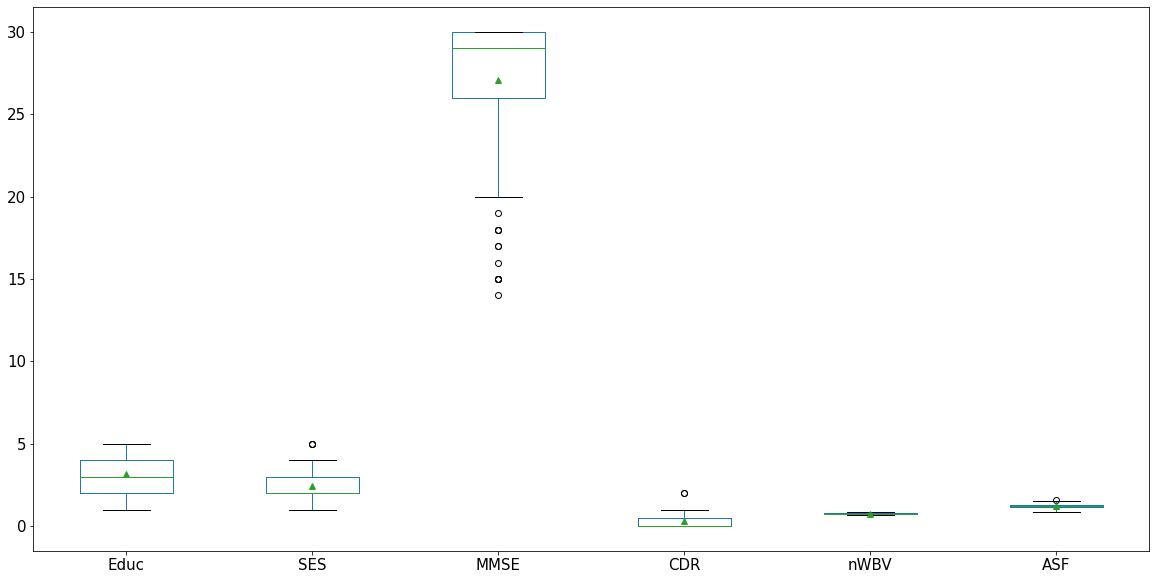

In [33]:
# Check for outliers
plt.figure(figsize=(20,10))
boxplot = oasis_cs_nonan.boxplot(column = ['Educ', 'SES', 'MMSE', 'CDR', 'nWBV', 'ASF'], grid=False, fontsize=15, showmeans=True)

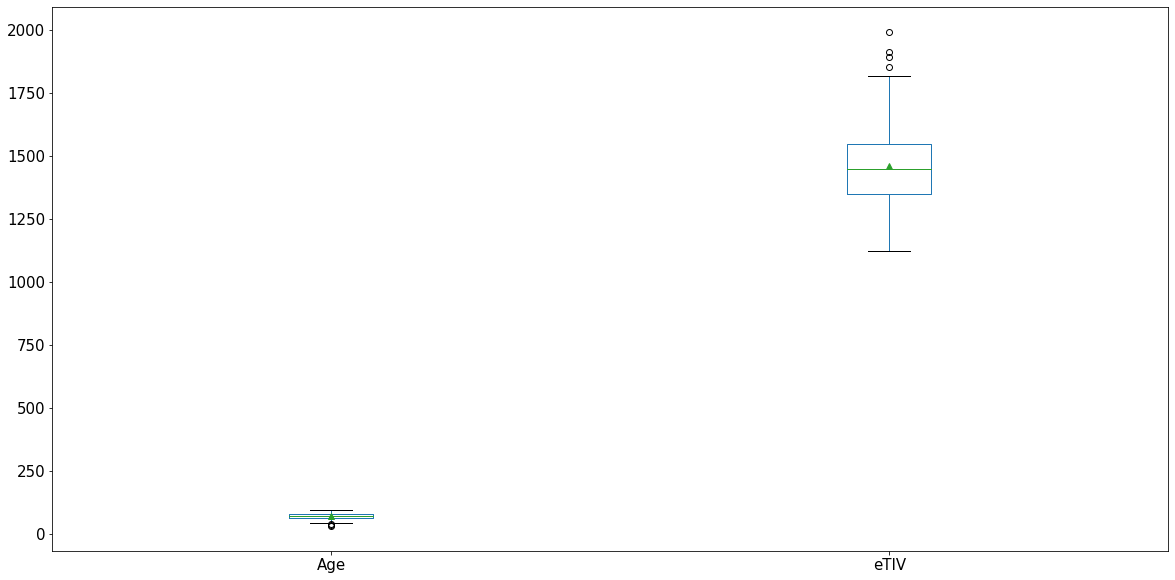

In [34]:
# Check for outliers
plt.figure(figsize=(20,10))
boxplot = oasis_cs_nonan.boxplot(column = ['Age', 'eTIV'], grid=False, fontsize=15, showmeans=True)

There does not appear to be any outliers that need to be removed within this dataset.

In [132]:
oasis_cs_nonan.dtypes

M/F      object
Hand     object
Age       int64
Educ    float64
SES     float64
MMSE    float64
CDR     float64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

In [138]:
oasis_cs_nonan.isnull().sum()

M/F     0
Hand    0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

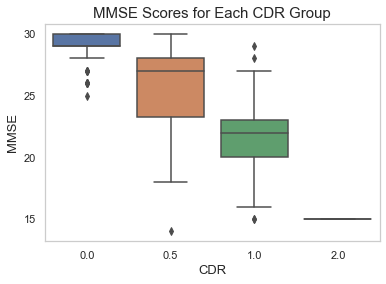

In [140]:
# Visualizing the mean, median, quartiles, and outliers for MMSE

plt.figure(figsize=(6,4))

sns.boxplot(x ='CDR', y ='MMSE', data = oasis_cs_nonan) 

plt.title('MMSE Scores for Each CDR Group', fontsize = 15)
plt.grid(False)
plt.xlabel('CDR', fontsize = 13)
plt.xticks(fontsize = 11)
plt.ylabel('MMSE', fontsize = 13)
plt.yticks(fontsize = 11)

plt.savefig('MMSE boxplot.png', transparent=True)

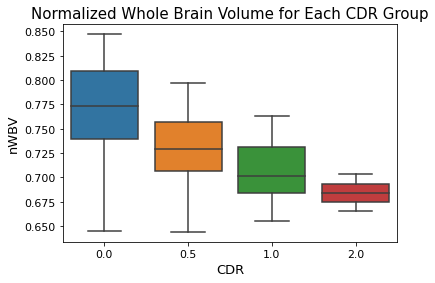

In [36]:
# Visualizing the mean, median, quartiles, and outliers for nWBV

plt.figure(figsize=(6,4))

sns.boxplot(x ='CDR', y ='nWBV', data = oasis_cs_nonan) 

plt.title('Normalized Whole Brain Volume for Each CDR Group', fontsize = 15)
plt.grid(False)
plt.xlabel('CDR', fontsize = 13)
plt.xticks(fontsize = 11)
plt.ylabel('nWBV', fontsize = 13)
plt.yticks(fontsize = 11)

plt.savefig('nWBV boxplot.png', transparent=True)

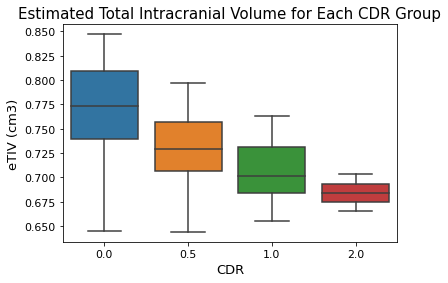

In [37]:
# Visualizing the mean, median, quartiles, and outliers for eTIV

plt.figure(figsize=(6,4))

sns.boxplot(x ='CDR', y ='nWBV', data = oasis_cs_nonan) 

plt.title('Estimated Total Intracranial Volume for Each CDR Group', fontsize = 15)
plt.grid(False)
plt.xlabel('CDR', fontsize = 13)
plt.xticks(fontsize = 11)
plt.ylabel('eTIV (cm3)', fontsize = 13)
plt.yticks(fontsize = 11)

plt.savefig('eTIV boxplot.png', transparent=True)

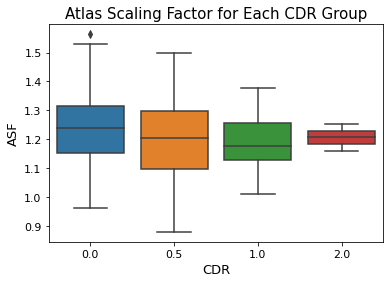

In [38]:
# Visualizing the mean, median, quartiles, and outliers for ASF

plt.figure(figsize=(6,4))

sns.boxplot(x ='CDR', y ='ASF', data = oasis_cs_nonan) 

plt.title('Atlas Scaling Factor for Each CDR Group', fontsize = 15)
plt.grid(False)
plt.xlabel('CDR', fontsize = 13)
plt.xticks(fontsize = 11)
plt.ylabel('ASF', fontsize = 13)
plt.yticks(fontsize = 11)

plt.savefig('ASF boxplot.png', transparent=True)

In [39]:
# Make dummy variables for categorical M/F and Hand
oasis_cs_dummies = pd.get_dummies(oasis_cs_nonan, prefix=['M/F', 'Hand'], columns=['M/F', 'Hand'])
oasis_cs_dummies.head()

Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  M/F_F  M/F_M  Hand_R
0   74   2.0  3.0  29.0  0.0  1344  0.743  1.306      1      0       1
1   55   4.0  1.0  29.0  0.0  1147  0.810  1.531      1      0       1
2   73   4.0  3.0  27.0  0.5  1454  0.708  1.207      1      0       1
8   74   5.0  2.0  30.0  0.0  1636  0.689  1.073      0      1       1
9   52   3.0  2.0  30.0  0.0  1321  0.827  1.329      1      0       1

In [40]:
oasis_cs_dummies.to_csv('oasis_cs_dummies.csv')

### Data Collection - b

In [41]:
# load the data and print the first five rows
oasis_lon = pd.read_csv('oasis_longitudinal.csv')
oasis_lon.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

### Data Definition - b

In [42]:
# Print the columns names
oasis_lon.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [43]:
# Check associated datatypes with columns
oasis_lon_dt = pd.DataFrame(oasis_lon.dtypes)
oasis_lon_dt = oasis_lon_dt.reset_index()
oasis_lon_dt.columns = ['Col_name','dtype']
oasis_lon_dt

Col_name    dtype
0   Subject ID   object
1       MRI ID   object
2        Group   object
3        Visit    int64
4     MR Delay    int64
5          M/F   object
6         Hand   object
7          Age    int64
8         EDUC    int64
9          SES  float64
10        MMSE  float64
11         CDR  float64
12        eTIV    int64
13        nWBV  float64
14         ASF  float64

In [44]:
# Make and save a figure of dataset description
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(columnwidth = [60,300, 100], header=dict(values=['Variable', 'Details', 'Type']),
                 cells=dict(values=[['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
                                    'eTIV', 'nWBV', 'ASF'],
                                    ['Subject Identification number', 'MRI identification number', 'Demented, Nondemented, or Converted (developed disease during study)', 'Which visit image was taken', 'Number of days since first image', 'Gender of patient (M=male and F=female)', 'Patient handedness (right or left)',
                                    'Age of patients (in years)', 'Number of years of education', 'Socioeconomic status (1 = highest status, 5 = lowest status)',
                                    'Mini mental state examination (see Table 2)', 'Clinical dementia rating (0 = no dementia, 0.5 = very mild dementia, 1 = mild dementia, 2 = moderate dementia, 3 = severe dementia)',
                                    'Estimated total intracranial volume (cm3)', 'Normalized whole brain volumes', 'Atlas scaling factor - comparison of eTIV based on normalization of head size'], 
                                    ['Continuous', 'Continuous', 'Categorical', 'Categorical', 'Continuous', 'Categorical',
                                    'Categorical', 'Continuous', 'Categorical', 'Categorical', 'Categorical/Continuous', 'Categorical', 'Continuous', 'Continuous', 'Continuous']]))
                     ])
fig.update_layout(
    title={
        'text': "Description of Longitudinal Data",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=800,
    height=650)
fig.write_image('Description of Longitudinal Data.png')
fig.show()

In [45]:
# Check shape of dataset
oasis_lon.shape

(373, 15)

In [46]:
# Review summary statistics
oasis_lon.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

### Data Cleaning - b

In [47]:
# Are there missing values? Sum all missing values for each column
oasis_lon.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

There are missing values in the following columns:
* SES
* MMSE

In [48]:
# Check for duplicate rows
oasis_lon_duplicate_rows = oasis_lon[oasis_lon.duplicated()]
oasis_lon_duplicate_rows

Empty DataFrame
Columns: [Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: []

There are no duplicate rows.

The missing values will be filled in with the mode of the respective columns because they are categorical values.

In [49]:
# Fill in missing numbers with mode for 'SES' and 'MMSE'
oasis_lon_fill = oasis_lon.copy()
oasis_lon_fill['SES'].fillna(float(oasis_lon_fill['SES'].mode()), inplace=True)
oasis_lon_fill['MMSE'].fillna(float(oasis_lon_fill['MMSE'].mode()), inplace=True)

In [50]:
# Are there missing values? Sum all missing values for each column
oasis_lon_fill.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [51]:
oasis_lon_fill.to_csv('oasis_lon_nonan.csv')

In [52]:
# Review summary statistics
oasis_lon_fill.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.436997   
std      0.922843   635.485118    7.640957    2.876339    1.109307   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  373.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.356568    0.290885  1488.128686    0.729568    1.195461  
std      3.678467    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

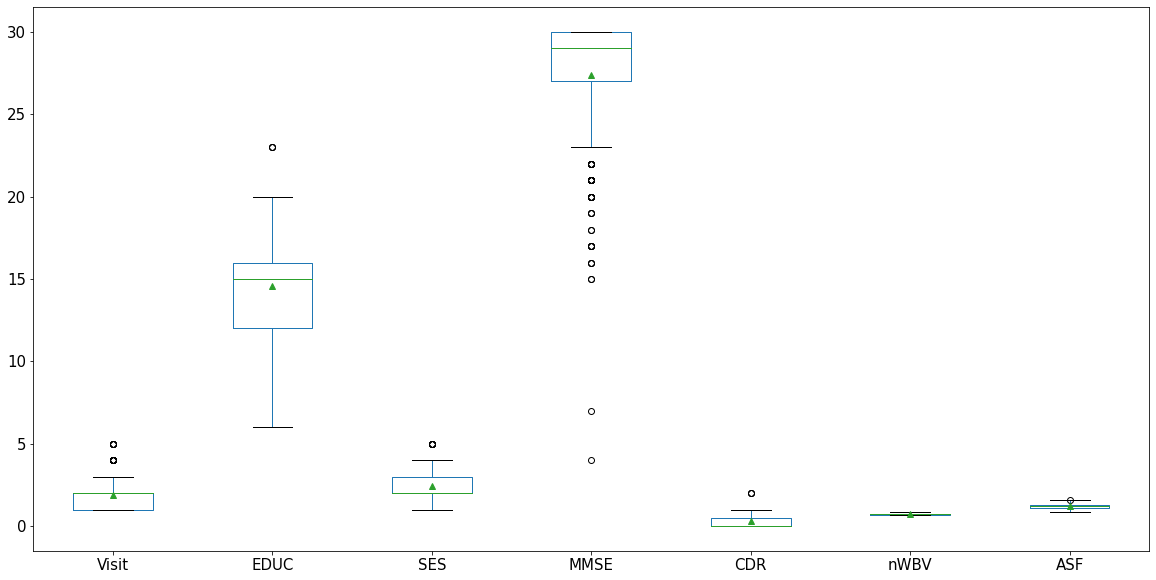

In [53]:
# Check for outliers
plt.figure(figsize=(20,10))
boxplot = oasis_lon_fill.boxplot(column = ['Visit', 'EDUC', 'SES', 'MMSE', 'CDR', 'nWBV', 'ASF'], grid=False, fontsize=15, showmeans=True)

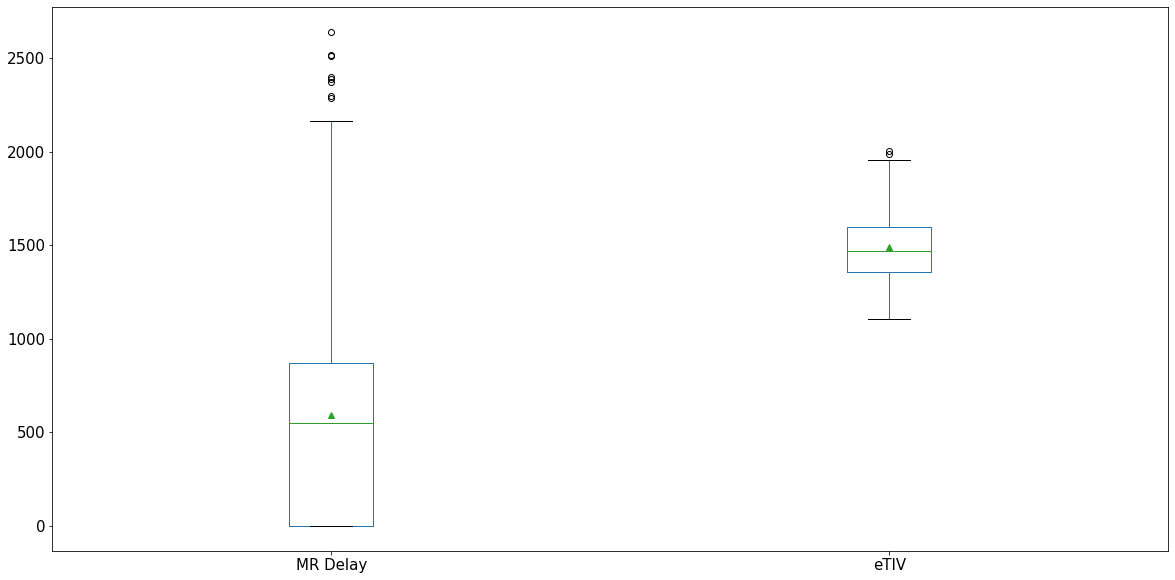

In [54]:
# Check for outliers
plt.figure(figsize=(20,10))
boxplot = oasis_lon_fill.boxplot(column = ['MR Delay', 'eTIV'], grid=False, fontsize=15, showmeans=True)

There do not appear to be any outliers that need to be removed.

In [55]:
# Create csv file for oasis_cs_for_model to use in future analyses
oasis_lon_fill.to_csv('oasis_lon_fill.csv', index=False)

In [56]:
# Make dummy variables for categorical M/F and Hand
oasis_lon_dummies = pd.get_dummies(oasis_lon_fill, prefix=['Group', 'Visit','M/F', 'Hand'], columns=['Group', 'Visit', 'M/F', 'Hand'])
oasis_lon_dummies.head()

Subject ID         MRI ID  MR Delay  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV  \
0  OAS2_0001  OAS2_0001_MR1         0   87    14  2.0  27.0  0.0  1987  0.696   
1  OAS2_0001  OAS2_0001_MR2       457   88    14  2.0  30.0  0.0  2004  0.681   
2  OAS2_0002  OAS2_0002_MR1         0   75    12  2.0  23.0  0.5  1678  0.736   
3  OAS2_0002  OAS2_0002_MR2       560   76    12  2.0  28.0  0.5  1738  0.713   
4  OAS2_0002  OAS2_0002_MR3      1895   80    12  2.0  22.0  0.5  1698  0.701   

   ...  Group_Demented  Group_Nondemented  Visit_1  Visit_2  Visit_3  Visit_4  \
0  ...               0                  1        1        0        0        0   
1  ...               0                  1        0        1        0        0   
2  ...               1                  0        1        0        0        0   
3  ...               1                  0        0        1        0        0   
4  ...               1                  0        0        0        1        0   

   Visit_5  M/F_F  M/F_M  Hand_R  
0        0      0      1       1  
1        0      0      1       1  
2        0      0      1       1  
3        0      0      1       1  
4        0      0      1       1  

[5 rows x 22 columns]

In [57]:
oasis_lon_dummies.to_csv('oasis_lon_dummies.csv')

### Data Collection - c

In [58]:
import matplotlib.image as mpimg
import imageio

In [59]:
os.getcwd()

'/Users/shannonballard/Springboard/Springboard_Capstone_3'

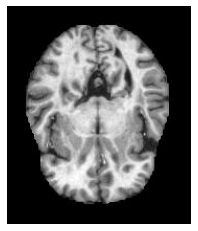

In [60]:
img = mpimg.imread('images/NonDemented_train/nonDem0.jpg')
imgplot = plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

In [61]:
print(img.shape)
print(img.dtype)

(208, 176)
uint8


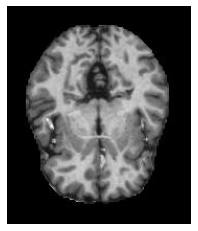

In [62]:
img2 = mpimg.imread('images/NonDemented_train/nonDem1.jpg')
imgplot2 = plt.imshow(img2, cmap="gray")
plt.axis('off')
plt.show()

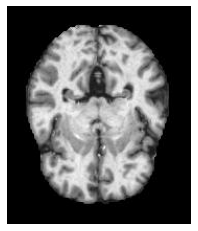

In [63]:
img3 = mpimg.imread('images/VeryMildDemented_train/verymildDem0.jpg')
imgplot3 = plt.imshow(img3, cmap="gray")
plt.axis('off')
plt.show()

In [64]:
print(img3.shape)
print(img3.dtype)

(208, 176)
uint8


The images seem to be of the same shape (208, 176) and the same type (uint8).

### Data Definition - c

In [148]:
# Make and save a figure of dataset description
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(columnwidth = [100,100], header=dict(values=['Patient Category', 'Number of jpeg Files']),
                 cells=dict(values=[['Non-Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented'],
                                    ['3200', '2240', '896', '64']]))
                     ])
fig.update_layout(
    title={
        'text': "Image Description For Demented Patients",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=800,
    height=350)
fig.write_image('Table 4_Image Description For Demented Patients.png')
fig.show()

### Data Cleaning - c

The images were downloaded under 4 separate folder names, and the image file names were not consistent. The image files will be renamed with the class + number.

In [66]:
NonDemented = "images/NonDemented"
for i, file in enumerate(os.listdir(NonDemented)):
    os.rename("images/NonDemented/" + file, "images/NonDemented/NonDemented" + str(i) + ".jpg")

In [67]:
VeryMildDemented = "images/VeryMildDemented"
for i, file in enumerate(os.listdir(VeryMildDemented)):
    os.rename("images/VeryMildDemented/" + file, "images/VeryMildDemented/VeryMildDemented" + str(i) + ".jpg")

In [68]:
MildDemented = "images/MildDemented"
for i, file in enumerate(os.listdir(MildDemented)):
    os.rename("images/MildDemented/" + file, "images/MildDemented/MildDemented" + str(i) + ".jpg")

In [69]:
ModerateDemented = "images/ModerateDemented"
for i, file in enumerate(os.listdir(ModerateDemented)):
    os.rename("images/ModerateDemented/" + file, "images/ModerateDemented/ModerateDemented" + str(i) + ".jpg")

EDA will be performed on the images below, and we will split the images into training, validation, and tests sets before this.

In [70]:
# Split images classes into train, validation, and test sets
# Train = 80%, Validation = 10%, Test = 10%

import splitfolders
splitfolders.ratio('images/Images', output="output_images", seed=1337, ratio=(.8, 0.1,0.1))


Copying files: 6400 files [01:46, 60.21 files/s] 


## Exploratory Data Analysis

### EDA - a

In [71]:
# Look at dataset
oasis_cs_dummies.head()

Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  M/F_F  M/F_M  Hand_R
0   74   2.0  3.0  29.0  0.0  1344  0.743  1.306      1      0       1
1   55   4.0  1.0  29.0  0.0  1147  0.810  1.531      1      0       1
2   73   4.0  3.0  27.0  0.5  1454  0.708  1.207      1      0       1
8   74   5.0  2.0  30.0  0.0  1636  0.689  1.073      0      1       1
9   52   3.0  2.0  30.0  0.0  1321  0.827  1.329      1      0       1

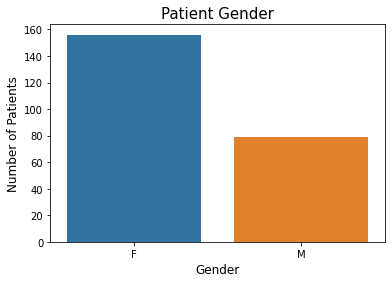

In [72]:
# Visualize the gender of study participants
sns.countplot(x='M/F', data=oasis_cs_nonan);
plt.title('Patient Gender', fontsize = 15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12);

More female patients participated in the study than males.

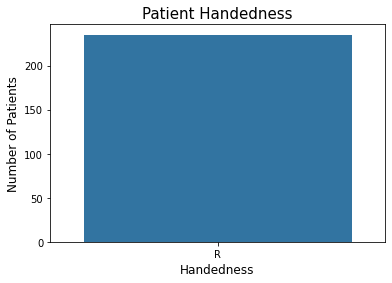

In [73]:
# Visualize the handedness of the patients
sns.countplot(x='Hand', data=oasis_cs_nonan);
plt.title('Patient Handedness', fontsize = 15)
plt.xlabel('Handedness', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12);

All patients were right handed.

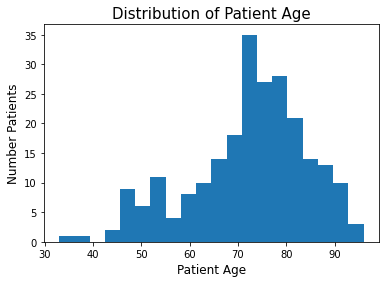

In [74]:
# Look at distribution of patient age

_ = plt.hist(oasis_cs_dummies.Age, bins=20)
_ = plt.title('Distribution of Patient Age', fontsize = 15)
_ = plt.xlabel('Patient Age', fontsize = 12)
_ = plt.ylabel('Number Patients', fontsize = 12)

Patient age ranges between just over 30 years to almost 100 years. The age groups with the most patients in the study are betwee 70 and 80 years. Very few patients in the study were between the ages 30 and 40 years. The plot looks a bit left-tailed/skewed, where majortity of participants are 70 years or older.

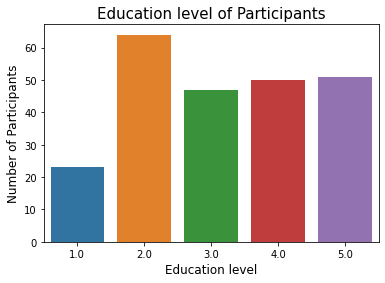

In [75]:
# Visualize the education level of participants
sns.countplot(x='Educ', data=oasis_cs_dummies);
plt.title('Education level of Participants', fontsize = 15)
plt.xlabel('Education level', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

Most participants had an education level of 2.

### EDA - b

In [76]:
# Look at dataset
oasis_lon_dummies.head()

Subject ID         MRI ID  MR Delay  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV  \
0  OAS2_0001  OAS2_0001_MR1         0   87    14  2.0  27.0  0.0  1987  0.696   
1  OAS2_0001  OAS2_0001_MR2       457   88    14  2.0  30.0  0.0  2004  0.681   
2  OAS2_0002  OAS2_0002_MR1         0   75    12  2.0  23.0  0.5  1678  0.736   
3  OAS2_0002  OAS2_0002_MR2       560   76    12  2.0  28.0  0.5  1738  0.713   
4  OAS2_0002  OAS2_0002_MR3      1895   80    12  2.0  22.0  0.5  1698  0.701   

   ...  Group_Demented  Group_Nondemented  Visit_1  Visit_2  Visit_3  Visit_4  \
0  ...               0                  1        1        0        0        0   
1  ...               0                  1        0        1        0        0   
2  ...               1                  0        1        0        0        0   
3  ...               1                  0        0        1        0        0   
4  ...               1                  0        0        0        1        0   

   Visit_5  M/F_F  M/F_M  Hand_R  
0        0      0      1       1  
1        0      0      1       1  
2        0      0      1       1  
3        0      0      1       1  
4        0      0      1       1  

[5 rows x 22 columns]

In [77]:
oasis_lon_fill.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  2.0  23.0  0.5  1678  0.736  1.046  
3  2.0  28.0  0.5  1738  0.713  1.010  
4  2.0  22.0  0.5  1698  0.701  1.034

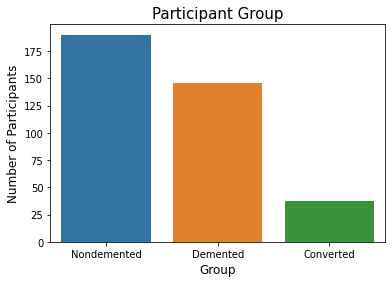

In [78]:
# Visualize the groups of study participants
sns.countplot(x='Group', data=oasis_lon_fill);
plt.title('Participant Group', fontsize = 15)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

plt.savefig('Lon Groups.png', transparent=True);

The majority of the participants were not demented. The number of participants that developed dementia/Alzheimer's during the study (coverted) was significantly lower than the other groups.

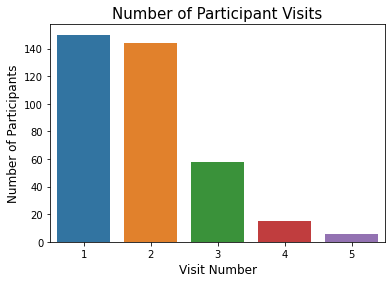

In [79]:
# Visualize the number of visits of participants
sns.countplot(x='Visit', data=oasis_lon_fill);
plt.title('Number of Participant Visits', fontsize = 15)
plt.xlabel('Visit Number', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

Most patients completed 2 visits within the study timeframe (1 and 2 are approximately the same). However, a little less than half, a quarter, and one-tenth of those participants completed a third, fourth, and fifth visit, respectively.

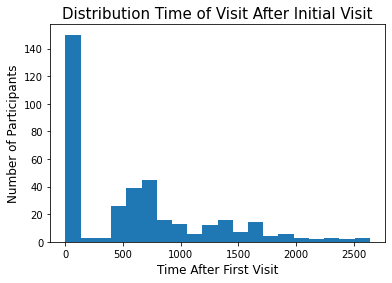

In [80]:
# Look at distribution of visit delay

_ = plt.hist(oasis_lon_dummies['MR Delay'], bins=20)
_ = plt.title('Distribution Time of Visit After Initial Visit', fontsize = 15)
_ = plt.xlabel('Time After First Visit', fontsize = 12)
_ = plt.ylabel('Number of Participants', fontsize = 12)

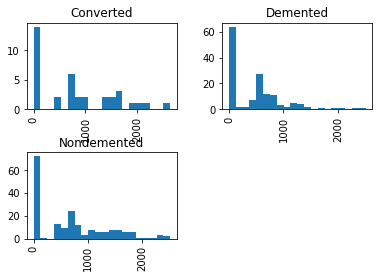

In [81]:
oasis_lon_fill['MR Delay'].hist(by=oasis_lon_fill['Group'], bins=20);

Most visits occurred at day 0 (beginning of study). There is another peak between ~500 and 1000 days. This may be the second visit.

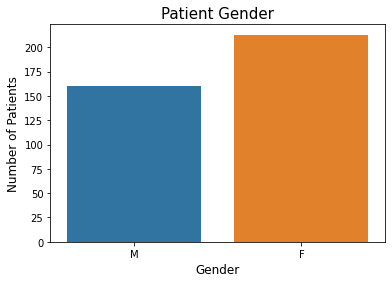

In [82]:
# Visualize the gender of study participants
sns.countplot(x='M/F', data=oasis_lon_fill);
plt.title('Patient Gender', fontsize = 15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12);

More female patients participated in the study than males.

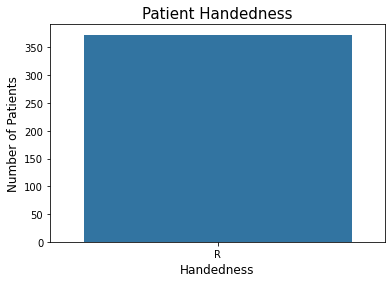

In [83]:
# Visualize the handedness of the patients
sns.countplot(x='Hand', data=oasis_lon_fill);
plt.title('Patient Handedness', fontsize = 15)
plt.xlabel('Handedness', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12);

All patients were right handed.

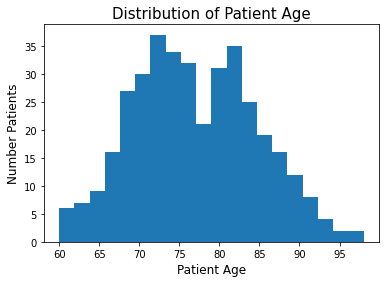

In [84]:
# Look at distribution of patient age

_ = plt.hist(oasis_lon_dummies.Age, bins=20)
_ = plt.title('Distribution of Patient Age', fontsize = 15)
_ = plt.xlabel('Patient Age', fontsize = 12)
_ = plt.ylabel('Number Patients', fontsize = 12)

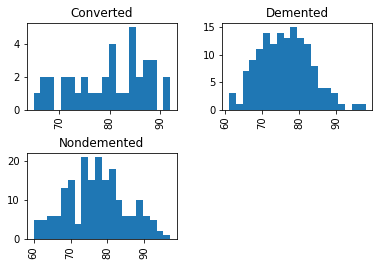

In [85]:
oasis_lon_fill['Age'].hist(by=oasis_lon_fill['Group'], bins=20);

Patient age ranges between 60 years to almost 100 years. The age groups with the most patients in the study are between 67 and 77 years as well as 79 years to 85 years. Very few patients in the study were between the ages 60 and 65 years as well as 90 to 100 years.

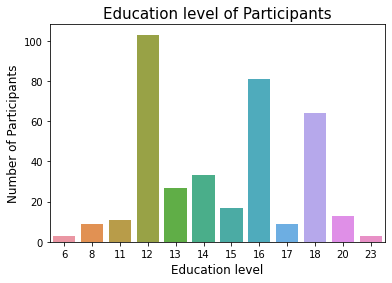

In [86]:
# Visualize the education level of participants
sns.countplot(x='EDUC', data=oasis_lon_dummies);
plt.title('Education level of Participants', fontsize = 15)
plt.xlabel('Education level', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

The majority of the participants finished at least high school (12 or higher), with many continuing and/or finishing college or graduate degrees (16 or higher).

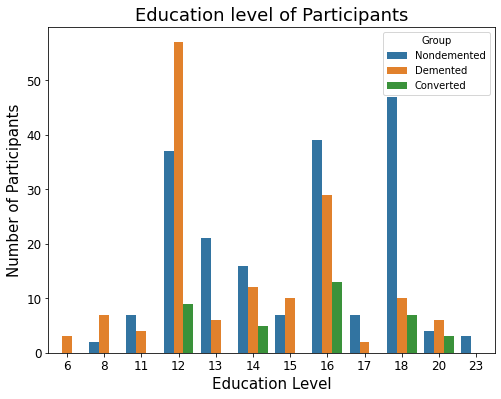

In [103]:
plt.figure(figsize=(8,6))
sns.countplot(data=oasis_lon_fill,x='EDUC',hue='Group')
plt.title('Education level of Participants', fontsize = 18)
plt.xlabel('Education Level', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Participants', fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title="Group", title_fontsize= 10, prop={'size': 10})
plt.savefig('Educ_lon graph.png', transparent=True);

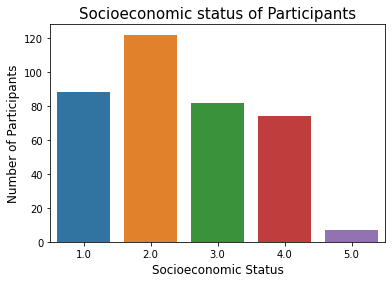

In [87]:
# Visualize the socioeconomic status of participants
sns.countplot(x='SES', data=oasis_lon_dummies);
plt.title('Socioeconomic status of Participants', fontsize = 15)
plt.xlabel('Socioeconomic Status', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

Most participants were of higher socioeconomic status (1 or 2).

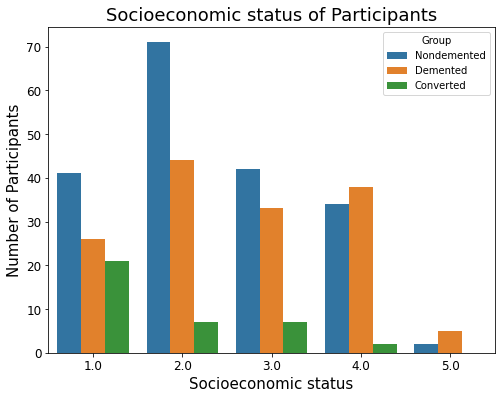

In [105]:
plt.figure(figsize=(8,6))
sns.countplot(data=oasis_lon_fill,x='SES',hue='Group')
plt.title('Socioeconomic status of Participants', fontsize = 18)
plt.xlabel('Socioeconomic status', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Participants', fontsize=15)
plt.yticks(fontsize=12)
plt.legend(loc = 'upper right', title="Group", title_fontsize= 10, prop={'size': 10})
plt.savefig('SES_lon graph.png', transparent=True);

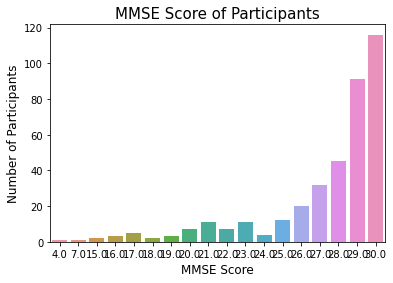

In [88]:
# Visualize the socioeconomic status of participants
sns.countplot(x='MMSE', data=oasis_lon_fill);
plt.title('MMSE Score of Participants', fontsize = 15)
plt.xlabel('MMSE Score', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

Most participants scored a 27 or higher. See below to see if this correlates with other features.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Nondemented v.s. Demented: t-test independent samples with Bonferroni correction, P_val=3.034e-34 stat=1.383e+01
Demented v.s. Converted: t-test independent samples with Bonferroni correction, P_val=5.700e-07 stat=-5.418e+00
Nondemented v.s. Converted: t-test independent samples with Bonferroni correction, P_val=9.126e-03 stat=2.996e+00


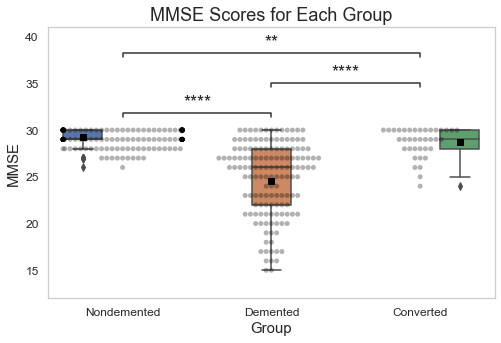

In [142]:
# Visualizing the mean, median, quartiles, and outliers for MMSE

from statannot import add_stat_annotation
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='Group', y='MMSE', hue='Group', data=oasis_lon_fill, showmeans=True, meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
ax.set(ylim=(12, 35))
sns.swarmplot(x='Group', y='MMSE', color='black', alpha = 0.3, data=oasis_lon_fill)
add_stat_annotation(ax, data=oasis_lon_fill, x='Group', y='MMSE', order=['Nondemented', 'Demented', 'Converted'],
                    box_pairs=[('Nondemented', 'Demented'), ('Nondemented', 'Converted'), ('Demented', 'Converted')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('MMSE Scores for Each Group', fontsize = 18)
plt.legend(fontsize=10, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Group', fontsize = 15)
plt.xticks(fontsize=12)
plt.ylabel('MMSE', fontsize = 15)
plt.yticks(fontsize=12)
ax.legend().set_visible(False)
plt.savefig('MMSE graph.png', transparent=True)

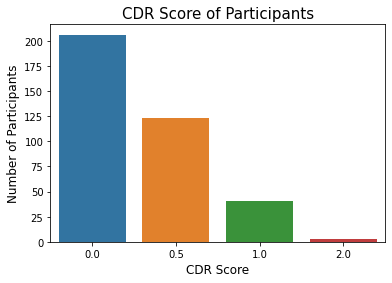

In [89]:
# Visualize the socioeconomic status of participants
sns.countplot(x='CDR', data=oasis_lon_dummies);
plt.title('CDR Score of Participants', fontsize = 15)
plt.xlabel('CDR Score', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12);

Most participants scored a 0.5 or below. See below to see if this correlates with other features.

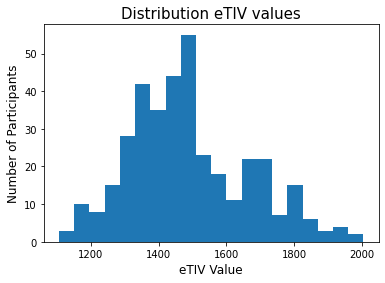

In [90]:
# Look at distribution of eTIV values

_ = plt.hist(oasis_lon_dummies['eTIV'], bins=20)
_ = plt.title('Distribution eTIV values', fontsize = 15)
_ = plt.xlabel('eTIV Value', fontsize = 12)
_ = plt.ylabel('Number of Participants', fontsize = 12)

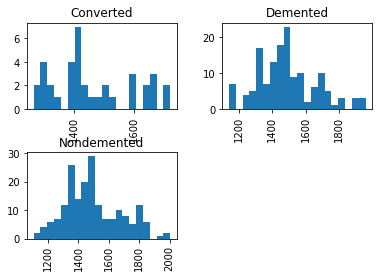

In [91]:
oasis_lon_fill['eTIV'].hist(by=oasis_lon_fill['Group'], bins=20);

The range of estimated intracranial volumes (eTIVs) of the participants is betwee 1100 and 2000 cm^3. Most participants display an eTIV of 1600 cm^3 or less. It appears to be right-tailed/skewed in its distribution with all participants and for the Demented and Nondemented groups.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Nondemented v.s. Demented: t-test independent samples with Bonferroni correction, P_val=3.034e-34 stat=1.383e+01
Demented v.s. Converted: t-test independent samples with Bonferroni correction, P_val=5.700e-07 stat=-5.418e+00
Nondemented v.s. Converted: t-test independent samples with Bonferroni correction, P_val=9.126e-03 stat=2.996e+00


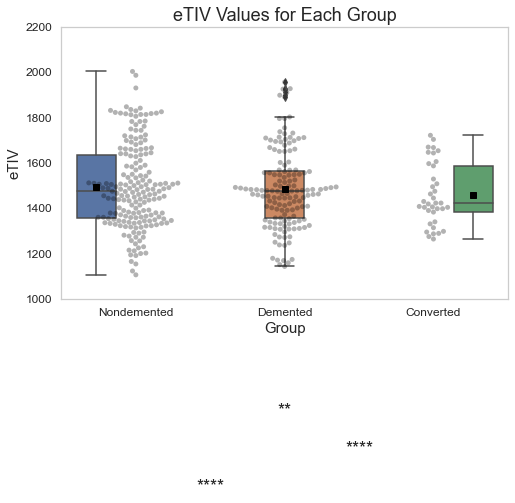

In [146]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='Group', y='eTIV', hue='Group', data=oasis_lon_fill, showmeans=True, meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
ax.set(ylim=(1000, 2200))
sns.swarmplot(x='Group', y='eTIV', color='black', alpha = 0.3, data=oasis_lon_fill)
add_stat_annotation(ax, data=oasis_lon_fill, x='Group', y='MMSE', order=['Nondemented', 'Demented', 'Converted'],
                    box_pairs=[('Nondemented', 'Demented'), ('Nondemented', 'Converted'), ('Demented', 'Converted')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('eTIV Values for Each Group', fontsize = 18)
plt.legend(fontsize=10, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Group', fontsize = 15)
plt.xticks(fontsize=12)
plt.ylabel('eTIV', fontsize = 15)
plt.yticks(fontsize=12)
ax.legend().set_visible(False)
plt.savefig('eTIV graph.png', transparent=True)

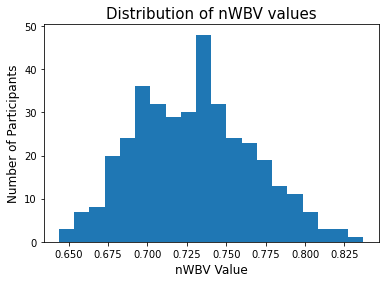

In [92]:
# Look at distribution of nWBV values

_ = plt.hist(oasis_lon_dummies['nWBV'], bins=20)
_ = plt.title('Distribution of nWBV values', fontsize = 15)
_ = plt.xlabel('nWBV Value', fontsize = 12)
_ = plt.ylabel('Number of Participants', fontsize = 12)

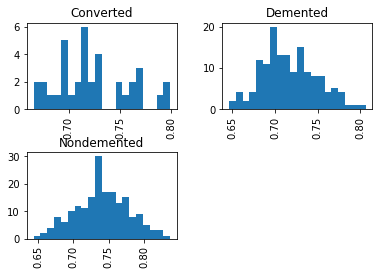

In [93]:
oasis_lon_fill['nWBV'].hist(by=oasis_lon_fill['Group'], bins=20);

The range of normalized whole brain volumes (nWBVs) of the participants is between 0.65 and 0.825. Most participants display an nWBV of between 0.675 and 0.78. It appears to display a normal distribution for all participants; however, the Demented group may display a right-tailed/skewed distribution.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Nondemented v.s. Demented: t-test independent samples with Bonferroni correction, P_val=2.371e-09 stat=6.330e+00
Demented v.s. Converted: t-test independent samples with Bonferroni correction, P_val=6.540e-01 stat=-1.236e+00
Nondemented v.s. Converted: t-test independent samples with Bonferroni correction, P_val=3.353e-02 stat=2.558e+00


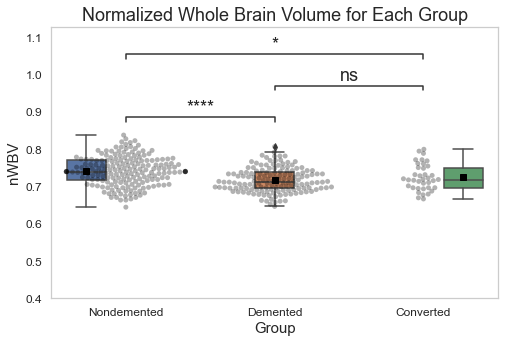

In [123]:
# Visualizing the mean, median, quartiles, and outliers for nWBV
from statannot import add_stat_annotation
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='Group', y='nWBV', hue='Group', data=oasis_lon_fill, showmeans=True, meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
ax.set(ylim=(0.4, 1))
sns.swarmplot(x='Group', y='nWBV', color='black', alpha = 0.3, data=oasis_lon_fill)
add_stat_annotation(ax, data=oasis_lon_fill, x='Group', y='nWBV', order=['Nondemented', 'Demented', 'Converted'],
                    box_pairs=[('Nondemented', 'Demented'), ('Nondemented', 'Converted'), ('Demented', 'Converted')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Normalized Whole Brain Volume for Each Group', fontsize = 18)
plt.legend(fontsize=10, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Group', fontsize = 15)
plt.xticks(fontsize=12)
plt.ylabel('nWBV', fontsize = 15)
plt.yticks(fontsize=12)
ax.legend().set_visible(False)
plt.savefig('nWBV graph.png', transparent=True)

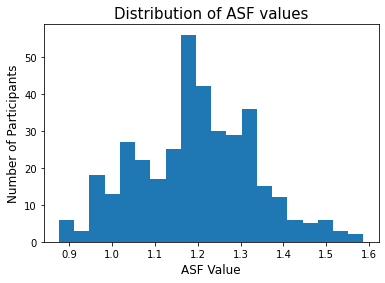

In [94]:
# Look at distribution of ASF values

_ = plt.hist(oasis_lon_dummies['ASF'], bins=20)
_ = plt.title('Distribution of ASF values', fontsize = 15)
_ = plt.xlabel('ASF Value', fontsize = 12)
_ = plt.ylabel('Number of Participants', fontsize = 12)

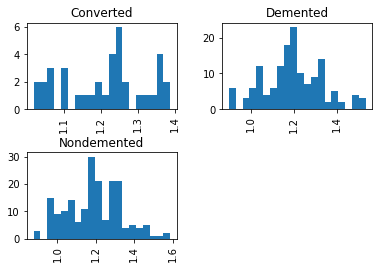

In [95]:
oasis_lon_fill['ASF'].hist(by=oasis_lon_fill['Group'], bins=20);

The range of Atlas Scaling Factor (ASF) of the participants is between 0.9 and 1.6. Most participants display an ASF of between 1.0 and 1.4. It may be normally distributed.

<AxesSubplot:>

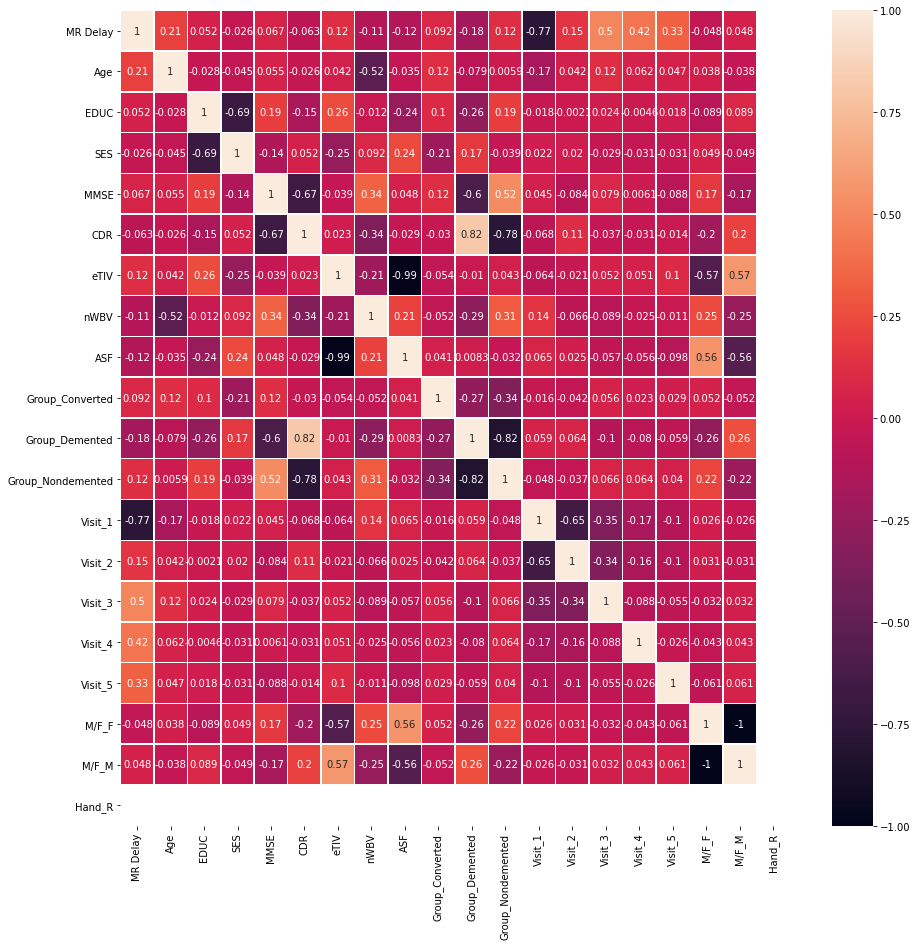

In [96]:
# Are any variables correlated with one another?
oasis_lon_corr = oasis_lon_dummies.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(oasis_lon_corr, annot=True, linewidths=.5)

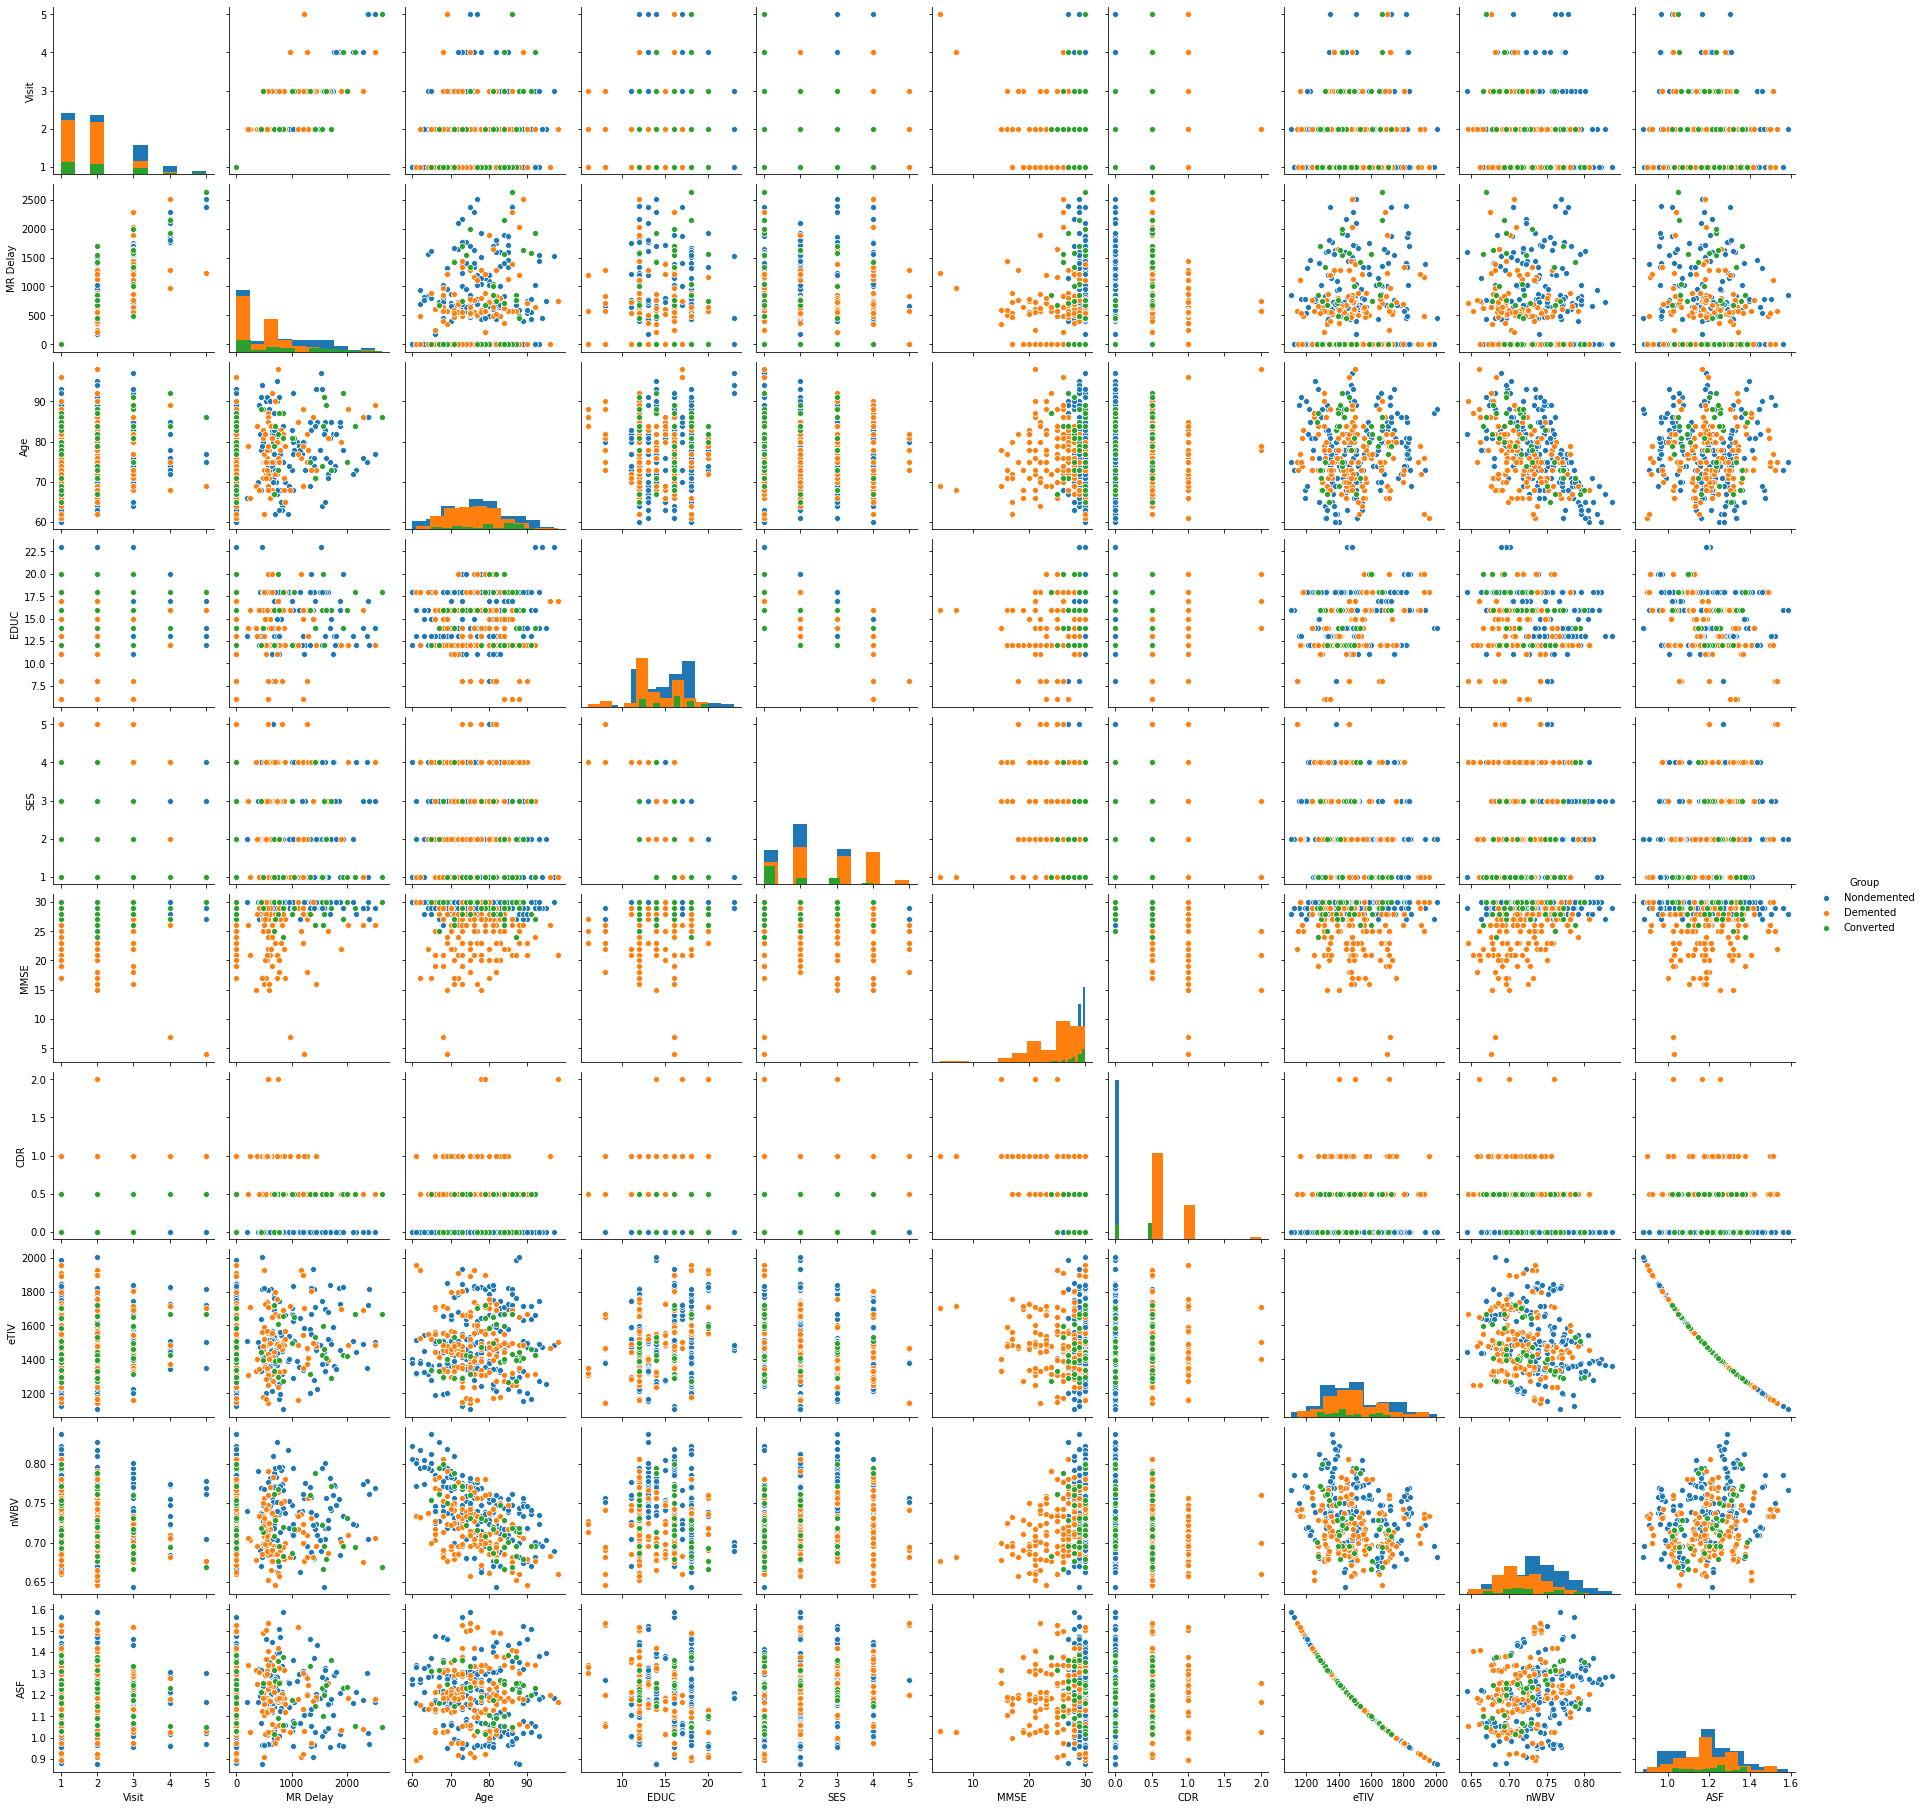

In [97]:
sns.pairplot(oasis_lon_fill, hue = 'Group', diag_kind="hist")

From the above comparisons, the following correlations and relationships stand out:
* There's a high positive correlation between CDR and the Demented group
* There's a high negative correlations/relationship between eTIV and ASF, but this is expected because ASF is calculated using eTIV values.
* Many of the 3rd, 4th, and 5th visits were made by participants in the Non-Demented Group
* Education shows a high negative correlation with socioeconomic status. However, it should be noted that EDUC has values where lower values suggest lower education levels, and high values of SES suggest higher socioeconomic values.
* There appears to be a shift in nWBVs between the different groups, where Demented participants hove lower values, and Non-demented participants have higher values.
* There is a negative correlation between Age and nWBV

### EDA - c

To better understand how to perform EDA steps with image analysis, this [article](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2) was used as a resource. The code in the article is used below.

In [98]:
# Convert images to pixel values in a Numpy array

from tensorflow.keras.preprocessing import image

train_dir = 'output_images/train'

# get the list of jpegs from sub image class folders
mild_imgs = [fn for fn in os.listdir(f'{train_dir}/MildDemented') if fn.endswith('.jpg')]
moderate_imgs = [fn for fn in os.listdir(f'{train_dir}/ModerateDemented') if fn.endswith('.jpg')]
non_imgs = [fn for fn in os.listdir(f'{train_dir}/NonDemented') if fn.endswith('.jpg')]
verymild_imgs = [fn for fn in os.listdir(f'{train_dir}/VeryMildDemented') if fn.endswith('.jpg')]

# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
mild_images = img2np(f'{train_dir}/MildDemented/', mild_imgs)
moderate_images = img2np(f'{train_dir}/ModerateDemented/', moderate_imgs)
non_images = img2np(f'{train_dir}/NonDemented/', non_imgs)
verymild_images = img2np(f'{train_dir}/VeryMildDemented/', verymild_imgs)

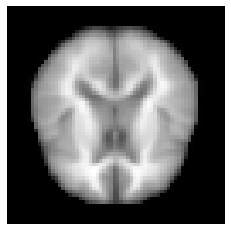

<Figure size 432x288 with 0 Axes>

In [157]:
# Look at the average image for each class

def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img

non_mean = find_mean_img(non_images, 'Non-Demented')

imgplot4 = plt.imshow(non_mean, cmap="gray")
plt.axis('off')
plt.savefig('non_mean.png')
plt.show()



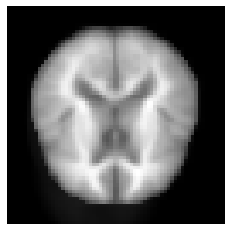

In [158]:
verymild_mean = find_mean_img(verymild_images, 'Very Mild Demented')
imgplot5 = plt.imshow(verymild_mean, cmap="gray")
plt.axis('off')
plt.savefig('verymild_mean.png')
plt.show()

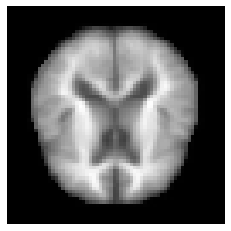

In [159]:
mild_mean = find_mean_img(mild_images, 'Mild Demented')
imgplot6 = plt.imshow(mild_mean, cmap="gray")
plt.axis('off')
plt.savefig('mild_mean.png')
plt.show()

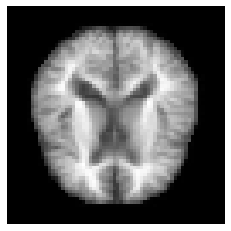

In [160]:
moderate_mean = find_mean_img(moderate_images, 'Moderate Demented')
imgplot4 = plt.imshow(moderate_mean, cmap="gray")
plt.axis('off')
plt.savefig('moderate_mean.png')
plt.show()

It appears as if more "gray" areas and less "white" areas are displayed in the images, especially in the periphery, as the disease progresses from normal to moderate dementia.

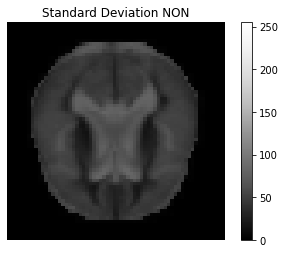

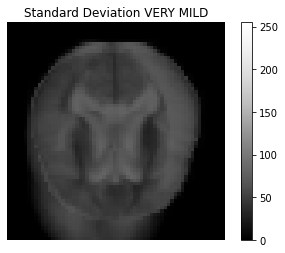

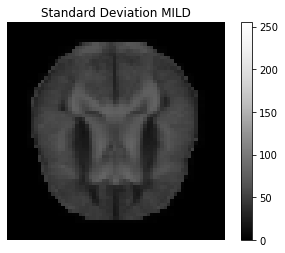

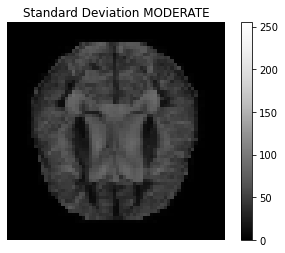

In [100]:
# Which areas are most variable in the different classes?

def find_std_img(full_mat, title, size = (64, 64)):
    # calculate the average
    std_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    plt.imshow(std_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Standard Deviation {title}')
    plt.colorbar()
    plt.axis('off')
    plt.show()
    return std_img

non_std = find_std_img(non_images, 'NON')
verymild_std = find_std_img(verymild_images, 'VERY MILD')
mild_std = find_std_img(mild_images, 'MILD')
moderate_std = find_std_img(moderate_images, 'MODERATE')

In the above images, the lighter areas represent regions of high variability.

Below, principal component analysis (PCA) will be used to look at which images best describe the 4 classes. This performs a reduction in dimensions, as the resulting images will encompass a subset of the images in each class that represent the training images for each class. These are called eigenimages, which are eigenvectors of an image that will be used to generate the covariance matrix.

The principal components that represent 70% of the variability in each class will be given below.

In [163]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    # whiten to reduce redundancy in images (adjacent pixel values can be highly correlated, want to reduce this)
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')

Number of PC:  70


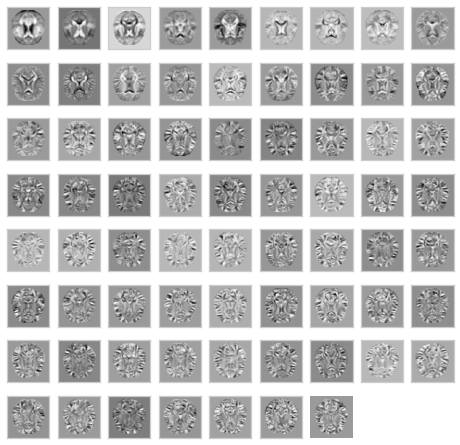

In [165]:
plot_pca(eigenimages(non_images, 'Non-Demented'))


plt.axis('off')
plt.savefig('non_pca.png')
plt.show()

Number of PC:  46


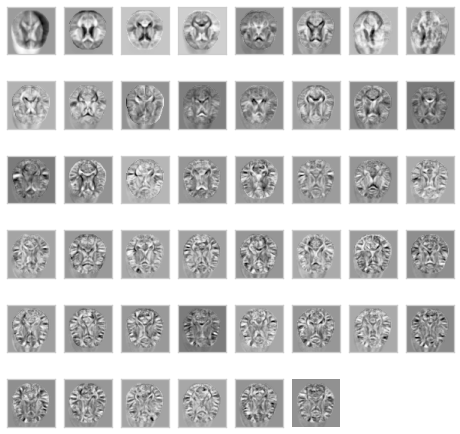

In [166]:
plot_pca(eigenimages(verymild_images, 'Very Mild Demented'))


plt.axis('off')
plt.savefig('verymild_pca.png')
plt.show()

Number of PC:  41


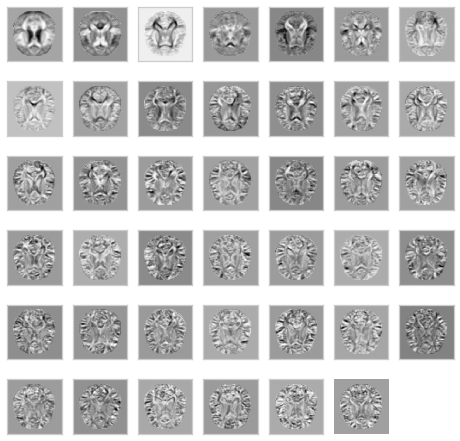

In [167]:
plot_pca(eigenimages(mild_images, 'Mild Demented'))


plt.axis('off')
plt.savefig('mild_pca.png')
plt.show()

Number of PC:  5


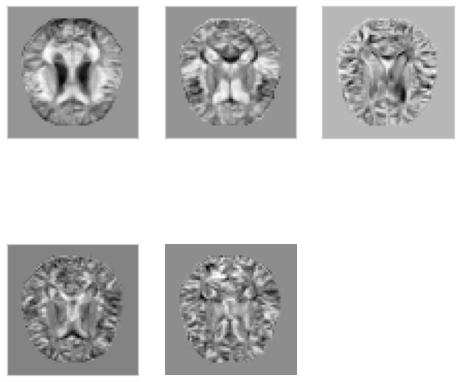

In [168]:
plot_pca(eigenimages(moderate_images, 'Moderate Demented'))


plt.axis('off')
plt.savefig('moderate_pca.png')
plt.show()
